# COMP4318/COMP5318 Assignment 2

In this template, we have provided data loading code and section headings to help structure your notebook. Please refer to the assignment specification pdf to guide the content of your notebook and report.


(Add SIDs here)

# Setup

In [4]:
# Please include your imports in this cell
import numpy as np
#import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
import imblearn
import sklearn
from  sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


import matplotlib.pyplot as plt

%matplotlib inline

# Data loading, exploration, and preprocessing

## Data loading

In [3]:
# Load data files assuming Assignment2Data folder 
# is present in the same directory as the notebook
X_train = np.load('Assignment2Data/X_train.npy')
y_train = np.load('Assignment2Data/y_train.npy')
X_test = np.load('Assignment2Data/X_test.npy')
y_test = np.load('Assignment2Data/y_test.npy')

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13673, 28, 28, 3)
(3419, 28, 28, 3)
(13673,)
(3419,)


In [4]:
X_train.dtype

dtype('uint8')

In [31]:
y_train.dtype

dtype('uint8')

In [46]:
unique_values, unique_indices = np.unique(y_train, return_index=True)
sorted_arr = y_train[unique_indices]
print(sorted_arr)

[0 1 2 3 4 5 6 7]


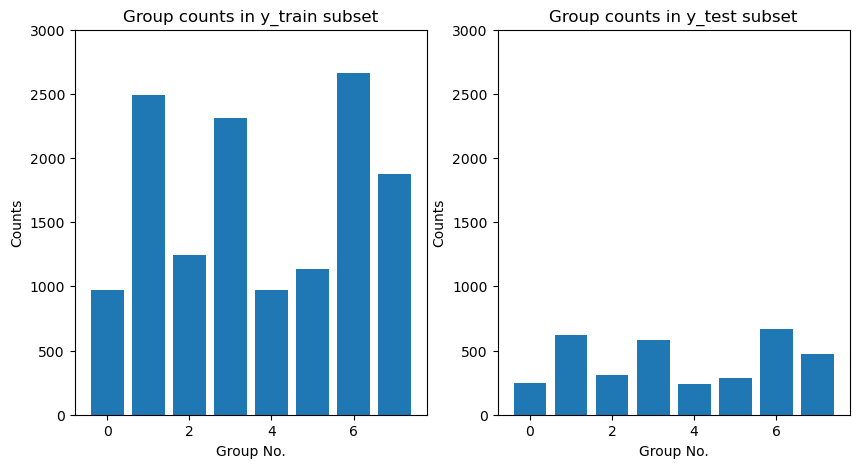

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
unique_values_1, counts_1 = np.unique(y_train, return_counts=True)
unique_values_2, counts_2 = np.unique(y_test, return_counts=True)

plt.subplot(1,2,1)
plt.bar(unique_values_1, counts_1)
plt.xlabel('Group No.')
plt.ylabel('Counts')
plt.ylim(bottom = 0, top = 3000)
plt.title('Group counts in y_train subset')

plt.subplot(1,2,2)
plt.bar(unique_values_2, counts_2)
plt.xlabel('Group No.')
plt.ylabel('Counts')
plt.title('Group counts in y_test subset')
plt.ylim(bottom = 0, top = 3000)
plt.show()

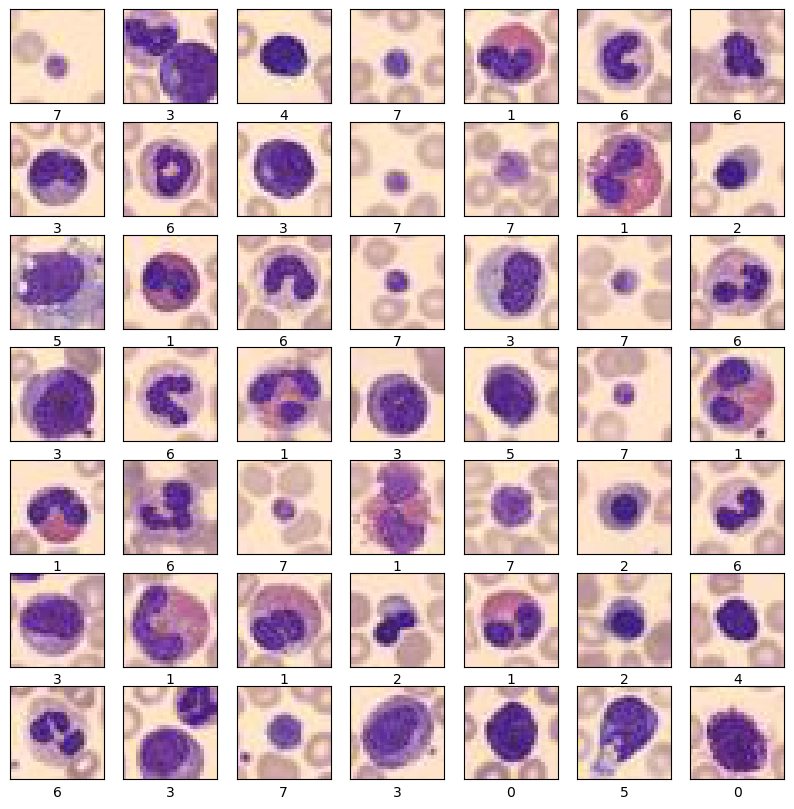

In [47]:
class_names = sorted_arr

plt.figure(figsize=(10,10))
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])
plt.show()


In [4]:
#Normalizing
X_train_n = X_train /255
X_test_n = X_test /255

In [5]:
#Catagorizing
num_classes = 8
y_train_c = keras.utils.to_categorical(y_train, num_classes)
y_test_c = keras.utils.to_categorical(y_test, num_classes)

In [6]:
y_test_c[0]

array([0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [10]:
X_train_n.shape[1:]

(28, 28, 3)

In [13]:
model_mlp = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28, 3]),
    keras.layers.Dense(128,),
    keras.layers.LeakyReLU(alpha=0.05),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64,),
    keras.layers.LeakyReLU(alpha=0.05),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(32,),
    keras.layers.LeakyReLU(alpha=0.05),
    keras.layers.Dense(8, activation="softmax")
])

opt = keras.optimizers.SGD(learning_rate=5e-2)
model_mlp.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics= ['categorical_accuracy'])

# history = model.fit(X_train_n, y_train_c, epochs=20, batch_size= 16,
#                     validation_data=(X_test_n, y_test_c))

batch_size = 32
num_classes = 8
epochs = 20
history_mlp = model_mlp.fit(X_train_n, y_train_c,batch_size=batch_size,epochs=epochs,validation_data=(X_test_n, y_test_c),shuffle=True,
                    )

# loss, accuracy = model.evaluate(X_test_n, y_test_c)
# print(f"Accuracy on test data: {accuracy:.4f}")

Epoch 1/20
428/428 [==============================] - 1s 2ms/step - loss: 1.2837 - categorical_accuracy: 0.5119 - val_loss: 0.9189 - val_categorical_accuracy: 0.6575
Epoch 2/20
428/428 [==============================] - 1s 1ms/step - loss: 0.9667 - categorical_accuracy: 0.6323 - val_loss: 0.9326 - val_categorical_accuracy: 0.6388
Epoch 3/20
428/428 [==============================] - 1s 1ms/step - loss: 0.8826 - categorical_accuracy: 0.6686 - val_loss: 0.7313 - val_categorical_accuracy: 0.7297
Epoch 4/20
428/428 [==============================] - 0s 1ms/step - loss: 0.8361 - categorical_accuracy: 0.6843 - val_loss: 0.7129 - val_categorical_accuracy: 0.7417
Epoch 5/20
428/428 [==============================] - 1s 1ms/step - loss: 0.8039 - categorical_accuracy: 0.6933 - val_loss: 0.7133 - val_categorical_accuracy: 0.7289
Epoch 6/20
428/428 [==============================] - 1s 1ms/step - loss: 0.7625 - categorical_accuracy: 0.7113 - val_loss: 0.6697 - val_categorical_accuracy: 0.7505
Epoc

In [10]:
model_4 = Sequential()
    # Layer 1: Convolutional layer with 64 filters
model_4.add(Conv2D(64, (3, 3), padding='same',input_shape=X_train_n.shape[1:]))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())

    # Layer 2: Convolutional layer with 64 filters
model_4.add(Conv2D(64, (3, 3)))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

    # Layer 3: Convolutional layer with 128 filters
model_4.add(Conv2D(128, (3, 3), padding='same'))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())

    # Layer 4: Convolutional layer with 128 filters
model_4.add(Conv2D(128, (3, 3)))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

model_4.add(Flatten())
  # Layer 5: Fully connected layer with 512 units and L2 regularizatio
model_4.add(Dense(512,kernel_regularizer=l2(0.01)))
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))
    # Output layer: Fully connected layer with num_classes units for classification
model_4.add(Dense(num_classes))
model_4.add(Activation('softmax'))

model_4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics= ['categorical_accuracy'])

batch_size = 64
num_classes = 8
epochs = 20

history_cnn = model_4.fit(X_train_n, y_train_c,batch_size=batch_size,epochs=epochs,validation_data=(X_test_n, y_test_c),shuffle=True,
                    )

Epoch 1/20
214/214 [==============================] - 29s 131ms/step - loss: 5.3313 - categorical_accuracy: 0.7490 - val_loss: 7.9528 - val_categorical_accuracy: 0.2006
Epoch 2/20
214/214 [==============================] - 28s 132ms/step - loss: 1.4127 - categorical_accuracy: 0.8509 - val_loss: 6.6412 - val_categorical_accuracy: 0.2735
Epoch 3/20
214/214 [==============================] - 28s 129ms/step - loss: 0.8360 - categorical_accuracy: 0.8765 - val_loss: 0.7581 - val_categorical_accuracy: 0.8555
Epoch 4/20
214/214 [==============================] - 27s 125ms/step - loss: 0.6984 - categorical_accuracy: 0.8880 - val_loss: 0.7904 - val_categorical_accuracy: 0.8736
Epoch 5/20
214/214 [==============================] - 27s 128ms/step - loss: 0.6481 - categorical_accuracy: 0.9061 - val_loss: 0.9845 - val_categorical_accuracy: 0.7877
Epoch 6/20
214/214 [==============================] - 28s 130ms/step - loss: 0.5801 - categorical_accuracy: 0.9121 - val_loss: 0.8786 - val_categorical_acc

In [22]:
X_train_r =  np.reshape(X_train, (X_train.shape[0], -1))
X_test_r = np.reshape(X_test, (X_test.shape[0], -1))

X_train_r_n =  X_train_r/255.0
X_test_r_n = X_train_r/255.0

In [26]:
pipe1 = Pipeline([('classifier', SVC(kernel='linear', C = 1))])
pipe1.fit(X_train_r_n, y_train)

acc = cross_val_score(pipe1, X_train_r_n, y_train, cv = 5)
print("Training Acc = {:.2f}".format(acc.mean()))

y_pred = pipe1.predict(X_test_r_n)
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [1]:
print("hello, world")

hello, world


## Data exploration

## Preprocessing

## Examples of preprocessed data
Please print/display some examples of your preprocessed data here. 

# Algorithm design and setup

## Model 1 - Fully Connected Neural Network

## Model 2 - Convolutional Neural Network

## Model 3 - Algorithm Choice 1

## Model 4 - Algorithm Choice 2

# Hyperparameter tuning

## Model 1 - Fully Connected Neural Network

## Model 2 - Convolutional Neural Network

## Model 3 - Algorithm Choice 1

## Model 4 - Algorithm Choice 2

# Final Models

## Model 1 - Fully Connected Neural Network

## Model 2 - Convolutional Neural Network

## Model 3 - Algorithm Choice 1

## Model 4 - Algorithm Choice 2